In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=340
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

100%|██████████| 428/428 [02:27<00:00,  2.90it/s]


In [12]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))

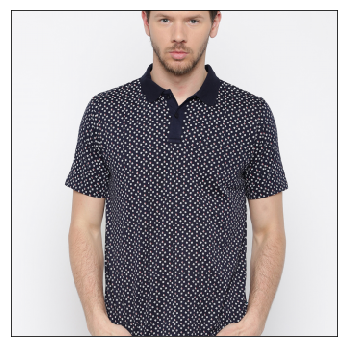

In [13]:
show_img(data.val_ds.denorm(to_np(x))[0],figsize=(6,6))

In [8]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|███████▉  | 1361/1709 [00:15<00:04, 86.16it/s, loss=4.94]

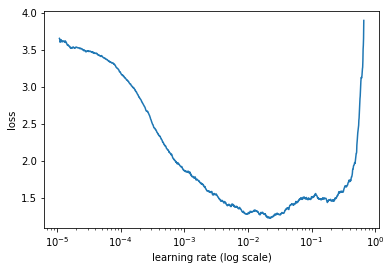

 80%|███████▉  | 1361/1709 [00:30<00:07, 45.33it/s, loss=4.94]

In [9]:
learn.sched.plot()

In [14]:
learn.fit(0.0005,20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

 10%|▉         | 164/1709 [00:04<00:43, 35.29it/s, loss=2.08]

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.263816   1.149988   0.67757   
    1      1.138832   1.061897   0.695532                      
    2      1.056277   1.01708    0.703855                     
    3      1.023276   0.992202   0.709112                      
    4      0.996866   0.973539   0.713785                       
    5      0.96877    0.956467   0.71656                        
    6      0.950459   0.946332   0.720356                       
    7      0.946782   0.933474   0.722547                       
    8      0.933185   0.927284   0.723496                       
    9      0.913282   0.920586   0.725832                      
    10     0.948102   0.911794   0.727366                       
    11     0.907828   0.907567   0.729264                       
    12     0.900425   0.900553   0.73182                        
    13     0.856677   0.89967    0.73255                        
    14     0.912929   0.890546   0.734083           

[0.88082242, 0.7375876168224299]

In [15]:
learn.fit(0.0005,10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.788653   0.875647   0.739194  
    1      0.791708   0.870939   0.740289                       
    2      0.796266   0.872363   0.741968                       
    3      0.798237   0.868382   0.744232                       
    4      0.792789   0.870034   0.742991                      
    5      0.768343   0.865634   0.744305                       
    6      0.729598   0.86304    0.743137                      
    7      0.7425     0.864845   0.746714                       
    8      0.748698   0.860057   0.746933                       
    9      0.757797   0.855323   0.7454                         



[0.85532331, 0.7454001168224299]

In [16]:
learn.fit(0.0001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.731321   0.85193    0.747006  
    1      0.726811   0.852986   0.747445                       
    2      0.71374    0.856224   0.746276                       
    3      0.676344   0.851943   0.746933                       



[0.85194278, 0.74693341121495327]

In [17]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 130    3    2    1    2   15   20   28   83    0   11    1   30    0    1   31    2    0   16   10    7
     1   60    0]
 [   2   60    0    0    0    1    0    0   18    0    2    0    8    0    0    0    1    0    0    1    0
     0   31    0]
 [   5    1   22    0    1    0    1    0    5    0    0    0    0    0    0    2    0    0    0    0    1
     0    7    0]
 [   1    0    0   29    0    0    0    5    0    0    0    0    0    0    0    9    0    0    2    0    0
     0    0    0]
 [   2    0    0    0  311    1    0    5    7    0    1    0    0    0    0  133    0    0   33    0    0
     0   20    0]
 [  12    0    0    0    0  124   15   24   29    0   13    0    2    0    0    8    2    1    1    2    0
     0   38    1]
 [  16    0    0    0    0   11  172    6   38    0    3    0    5    0    0   16    0    0    4    0    1
     0   35    0]
 [  23    0    2    2   10   26    9  202   21    0    1    0    0    2    3   

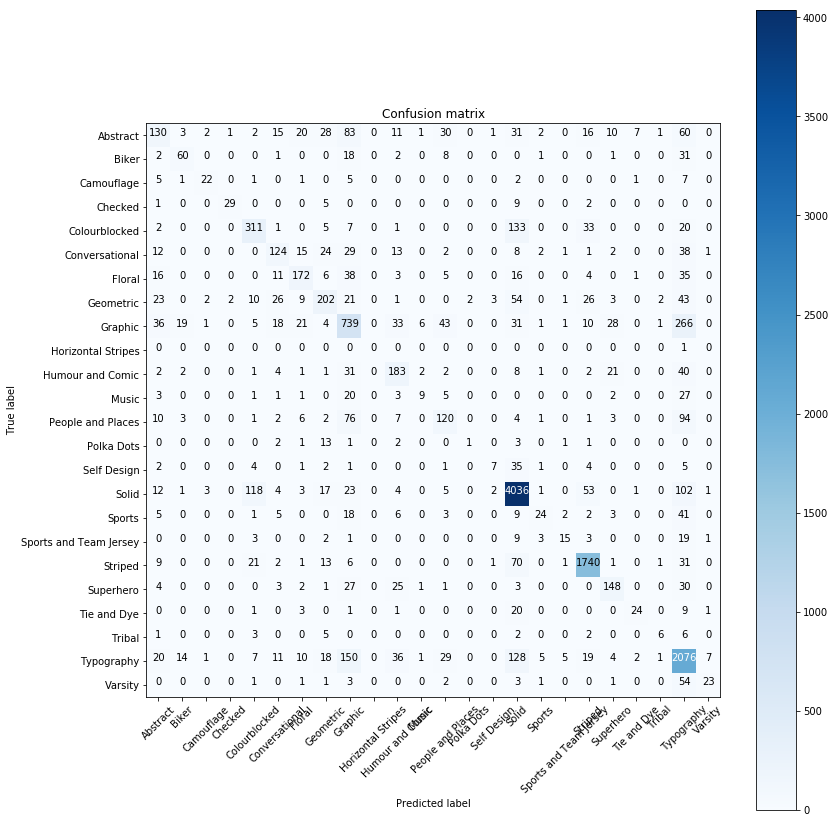

In [18]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.28634  0.00661  0.00441  0.0022   0.00441  0.03304  0.04405  0.06167  0.18282  0.       0.02423  0.0022
   0.06608  0.       0.0022   0.06828  0.00441  0.       0.03524  0.02203  0.01542  0.0022   0.13216  0.     ]
 [ 0.01613  0.48387  0.       0.       0.       0.00806  0.       0.       0.14516  0.       0.01613  0.
   0.06452  0.       0.       0.       0.00806  0.       0.       0.00806  0.       0.       0.25     0.     ]
 [ 0.11111  0.02222  0.48889  0.       0.02222  0.       0.02222  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.02222  0.       0.15556  0.     ]
 [ 0.02174  0.       0.       0.63043  0.       0.       0.       0.1087   0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.04348  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.       0.       0.       0.60624  0.00195  0.       0.00975  0.01365  0.       0.00195  0.

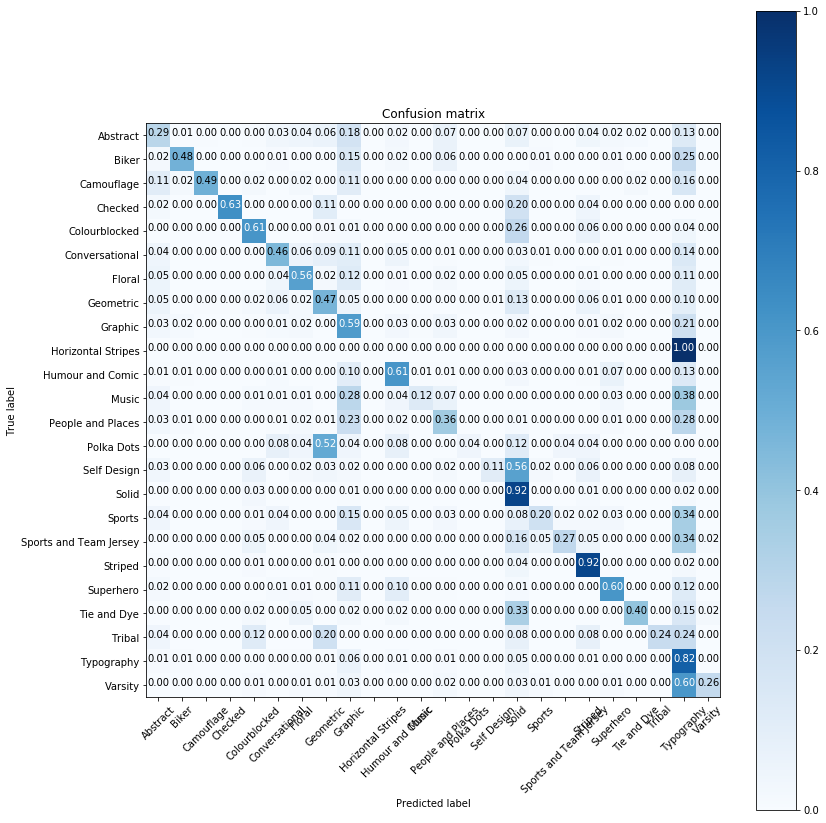

In [19]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [20]:
arch_201=dn121
sz=320

In [21]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [25]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [26]:
learn_no = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2)

In [27]:
learn_no.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.128468   0.998283   0.705096  
    1      1.014729   0.957688   0.716706                       
    2      0.914126   0.935328   0.721013                       
    3      0.884425   0.92439    0.725686                       
    4      0.903233   0.914813   0.729264                       



[0.91481262, 0.72926401869158874]

In [28]:
learn_no.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.813807   0.894635   0.734302  
    1      0.774385   0.894759   0.73474                        



[0.894759, 0.73474007009345799]

In [29]:
learn_no.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.75449    0.89017    0.737588  
    1      0.742417   0.891475   0.739048                       



[0.89147514, 0.73904789719626163]

In [30]:
learn_no.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.685434   0.87822    0.741165  
    1      0.619521   0.874016   0.742845                      
    2      0.658509   0.872263   0.743575                      
    3      0.617229   0.868605   0.744086                       
    4      0.644171   0.870467   0.745692                       



[0.87046695, 0.74569217289719625]

In [31]:
learn_no.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.635229   0.869016   0.745181  
    1      0.634632   0.865118   0.745254                       



[0.86511815, 0.74525408878504673]

In [32]:
learn_no.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.639024   0.865342   0.746787  
    1      0.625216   0.869315   0.745619                       



[0.86931503, 0.74561915887850472]

In [33]:
learn_no.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.609448   0.867286   0.747225  
    1      0.577259   0.86741    0.746933                       



[0.86741012, 0.74693341121495327]

In [34]:
log_preds_no,y_no = learn_no.TTA()
probs_no = np.mean(np.exp(log_preds_no),0)
accuracy_np(probs_no, y_no)
y_no[10]=9
predictions_no = np.argmax(probs_no,axis=1)
cm_no = confusion_matrix(y_no, predictions_no)


Confusion matrix, without normalization
[[ 134    6    1    1    3   14   20   32   72    0   11    0   26    0    1   33    2    0   15    3    5
     0   75    0]
 [   3   58    0    0    0    1    1    1   17    0    3    0    7    0    0    0    1    0    0    1    0
     0   31    0]
 [   5    1   24    0    0    0    1    0    6    0    0    0    0    0    0    2    0    0    0    0    0
     0    6    0]
 [   1    0    0   27    0    0    0    3    0    0    0    0    0    0    0   10    0    0    4    0    0
     0    1    0]
 [   0    0    0    0  294    0    1    5    7    0    1    0    0    0    0  146    0    0   33    1    2
     0   23    0]
 [  19    3    0    0    2  114   13   23   26    0   10    0    1    0    0   12    0    0    1    2    0
     0   45    1]
 [  11    1    0    0    0    6  191    7   27    0    2    0    8    0    0   17    0    0    4    2    0
     0   31    0]
 [  38    0    1    1    8   13    8  199   17    0    1    0    1    3    0   56    

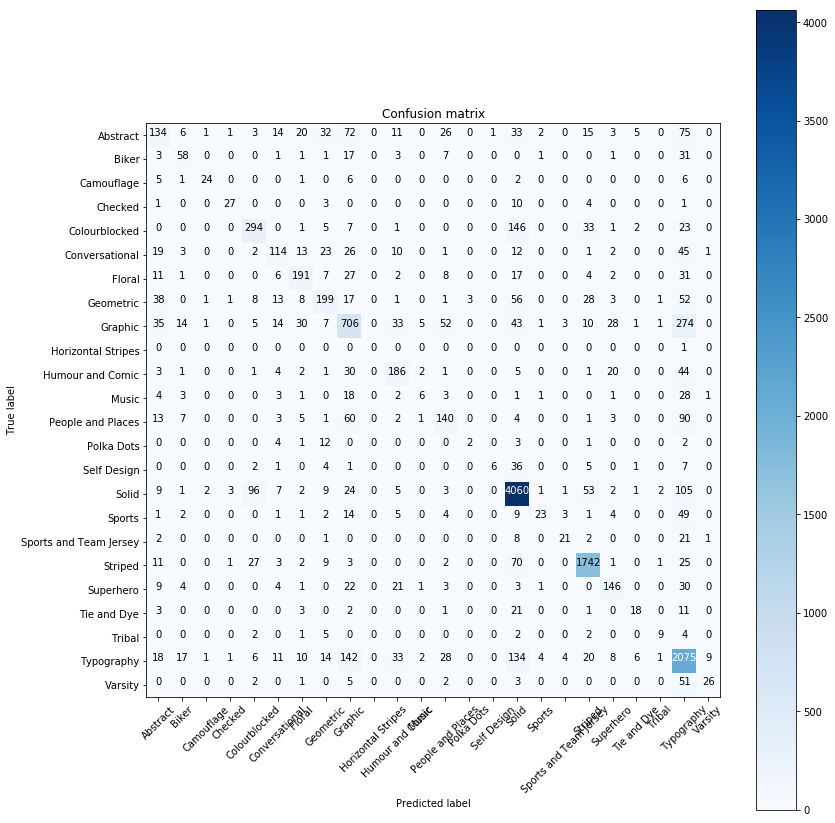

In [35]:
plot_confusion_matrix_mine(cm_no,data.classes,normalize=False)

In [36]:
probs_ensemble = probs_no + probs

In [37]:
probs_ensemble[:2]

array([[ 0.0035 ,  0.00009,  0.00058,  0.0003 ,  0.00185,  0.00973,  0.00025,  0.00966,  0.00134,  0.00011,
         0.00128,  0.00018,  0.00066,  0.00025,  0.00066,  1.92883,  0.00107,  0.00002,  0.00183,  0.     ,
         0.00065,  0.00013,  0.03306,  0.00399],
       [ 0.00691,  0.00097,  0.00008,  0.00034,  0.00047,  0.02776,  0.00471,  0.01946,  0.00071,  0.00039,
         0.00002,  0.00018,  0.00219,  0.00037,  0.00145,  1.79318,  0.00041,  0.00016,  0.01525,  0.00003,
         0.00311,  0.00013,  0.12004,  0.00168]], dtype=float32)

In [38]:
probs_ensemble = probs_ensemble/2

In [39]:
probs_ensemble[:2]

array([[ 0.00175,  0.00005,  0.00029,  0.00015,  0.00092,  0.00487,  0.00012,  0.00483,  0.00067,  0.00005,
         0.00064,  0.00009,  0.00033,  0.00013,  0.00033,  0.96442,  0.00053,  0.00001,  0.00092,  0.     ,
         0.00032,  0.00007,  0.01653,  0.00199],
       [ 0.00345,  0.00048,  0.00004,  0.00017,  0.00023,  0.01388,  0.00236,  0.00973,  0.00036,  0.00019,
         0.00001,  0.00009,  0.0011 ,  0.00018,  0.00072,  0.89659,  0.0002 ,  0.00008,  0.00763,  0.00001,
         0.00156,  0.00007,  0.06002,  0.00084]], dtype=float32)

In [41]:
accuracy_np(probs_ensemble, y_no)


0.7603892303189933

In [43]:
accuracy_np(probs,y_no)

0.74634182031021368

In [45]:
accuracy_np(probs_no,y_no)

0.74678080187298801

In [46]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [48]:
cm_ensemble = confusion_matrix(y_no, predictions_ensemble)


Confusion matrix, without normalization
[[ 135    5    2    1    3   14   18   29   79    0    9    0   27    0    1   30    0    0   14    5    6
     1   75    0]
 [   1   63    0    0    0    1    1    0   16    0    3    0    9    0    0    0    1    0    0    1    0
     0   28    0]
 [   4    1   24    0    1    0    1    0    5    0    0    0    0    0    0    2    0    0    0    0    1
     0    6    0]
 [   2    0    0   29    0    0    0    4    0    0    0    0    0    0    0    9    0    0    2    0    0
     0    0    0]
 [   1    0    0    0  312    1    0    4    5    0    1    0    0    0    0  137    0    0   32    0    0
     0   20    0]
 [  10    3    0    0    0  121   14   26   28    0   12    0    1    0    0   10    1    0    1    2    0
     0   42    1]
 [  15    0    0    0    0    9  188    6   30    0    4    0    5    0    0   16    0    0    3    0    0
     0   31    0]
 [  23    0    1    1    9   20    8  217   12    0    0    0    0    2    0   57    

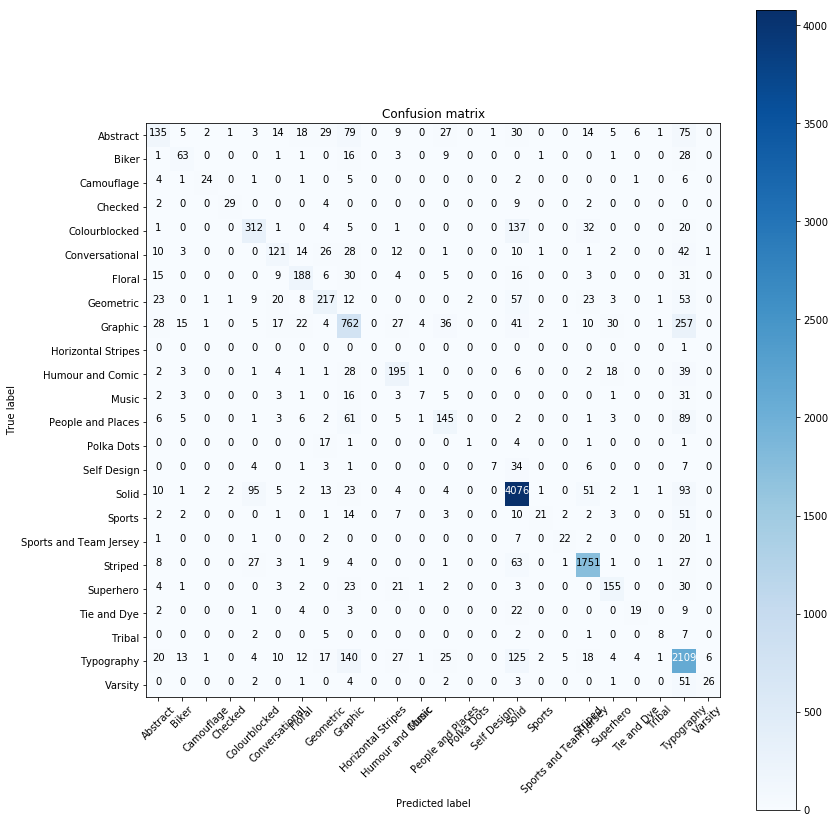

In [49]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.29736  0.01101  0.00441  0.0022   0.00661  0.03084  0.03965  0.06388  0.17401  0.       0.01982  0.
   0.05947  0.       0.0022   0.06608  0.       0.       0.03084  0.01101  0.01322  0.0022   0.1652   0.     ]
 [ 0.00806  0.50806  0.       0.       0.       0.00806  0.00806  0.       0.12903  0.       0.02419  0.
   0.07258  0.       0.       0.       0.00806  0.       0.       0.00806  0.       0.       0.22581  0.     ]
 [ 0.08889  0.02222  0.53333  0.       0.02222  0.       0.02222  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.02222  0.       0.13333  0.     ]
 [ 0.04348  0.       0.       0.63043  0.       0.       0.       0.08696  0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.04348  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.       0.       0.       0.60819  0.00195  0.       0.0078   0.00975  0.       0.00195  0.    

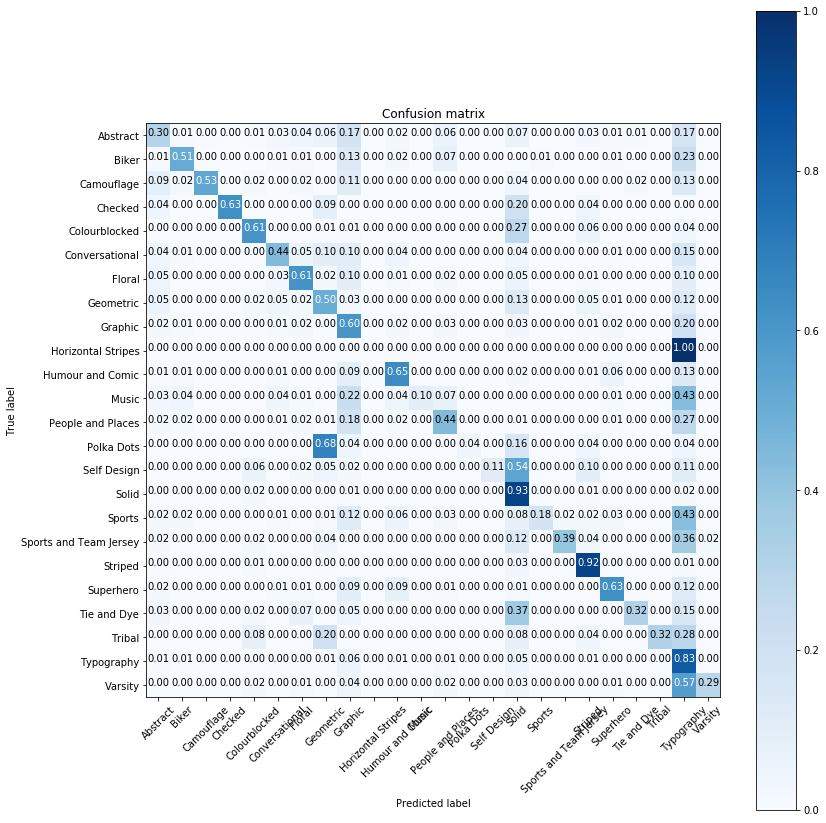

In [50]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [ ]:
learn.unfreeze()

In [ ]:
learn_no.unfreeze()

In [ ]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [ ]:
test = open_image(fname)
test= val_tfms((test))
test.shape

In [ ]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

In [ ]:
data.classes[np.argmax(pred_temp[0,:])]

In [ ]:
pred_temp_no = learn_no.predict_array(test[None])
pred_temp_no = np.exp(pred_temp_no)
pred_temp_no

In [ ]:
data.classes[np.argmax(pred_temp_no[0,:])]

In [ ]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [ ]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [ ]:
df.head()

In [ ]:
ensemble_three =  probs + probs_no

In [ ]:
ensemble_three[:3]

In [ ]:
ensemble_three= ensemble_three/3

In [ ]:
accuracy_np(ensemble_three,y)

In [ ]:
predictions_ensemble_three = np.argmax(ensemble_three,axis=1)

In [ ]:
predictions_ensemble

In [ ]:
cm = confusion_matrix(y, predictions_ensemble)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_three = learn_resnext.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two+pred_three)/3
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

In [ ]:
df.to_csv('myntra-ensemble-three.csv',index=False)